# Rainfall Prediction - Weather Forecasting

### Problem Statement:

<center><b>Rain Prediction –Weather forecasting</b></center>


<b>Weather forecasting</b> is the application of science and technology to predict the <b>conditions of the atmosphere</b> for a given <b> location and time. Weather forecasts</b> are made by <b>collecting quantitative</b> data about the <b>current state of the atmosphere</b> at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. <b>Here, predict two things:</b>
 
- <b>Problem Statement:</b>

>a) Design a predictive model with the use of machine learning algorithms to forecast <b>whether or not it will rain tomorrow.</b>

>b) Design a predictive model with the use of machine learning algorithms to <b>predict how much rainfall could be there.</b>


Dataset Description:

Number of columns: <b>23</b>


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

### Importing Required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [4]:
#Fetching Top 5 record
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
#Fetching Button 5 record
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [6]:
#Fetching Sample record
df.sample()

Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
3839  2016-04-02  Williamtown     14.2     33.2       0.0          NaN   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
3839       NaN           W           41.0         NW  ...        70.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
3839         12.0       1017.1       1014.0       NaN       NaN     19.0   

      Temp3pm  RainToday  RainTomorrow  
3839     32.7         No            No  

[1 rows x 23 columns]

### EDA

In [7]:
df.shape

(8425, 23)

We have 23 columns and 8425 rows in data set

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [10]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

#### Checking Null values

In [11]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

### Checking Data

In [12]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [13]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [15]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [18]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [19]:
df['Rainfall'].max()

371.0

In [20]:
df['Rainfall'].min()

0.0

In [21]:
df['WindSpeed9am'].max()

63.0

In [22]:
df['WindSpeed9am'].min()

0.0

In [23]:
df['WindSpeed3pm'].max()

83.0

In [24]:
df['WindSpeed3pm'].min()

0.0

In [25]:
df['Temp9am'].max()

39.4

In [26]:
df['Temp9am'].min()

1.9

In [27]:
df['Pressure9am'].max()

1039.0

In [28]:
df['Pressure3pm'].max()

1036.0

#### Replacing NaN values with mode and mean

In [29]:
#date,location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow

df['Date'] = pd.to_datetime(df['Date'])

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [30]:
df.drop(['Date'],axis=1,inplace=True)

In [31]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 25 columns]

In [32]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [33]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 25 columns]

In [34]:
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

In [36]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
day              0
month            0
year             0
dtype: int64

In [38]:
df.describe().T

count         mean        std     min          25%  \
MinTemp        8425.0    13.193305   5.379488    -2.0     9.300000   
MaxTemp        8425.0    23.859976   6.114516     8.2    19.300000   
Rainfall       8425.0     2.805913  10.309308     0.0     0.000000   
Evaporation    8425.0     5.389395   3.852004     0.0     4.000000   
Sunshine       8425.0     7.632205   2.825451     0.0     7.632205   
WindGustSpeed  8425.0    40.174469  13.776101     7.0    31.000000   
WindSpeed9am   8425.0    13.847646  10.128579     0.0     6.000000   
WindSpeed3pm   8425.0    18.533662   9.704759     0.0    11.000000   
Humidity9am    8425.0    67.822496  16.774231    10.0    56.000000   
Humidity3pm    8425.0    51.249790  18.311894     6.0    39.000000   
Pressure9am    8425.0  1017.640233   6.275759   989.8  1014.000000   
Pressure3pm    8425.0  1015.236075   6.217451   982.9  1011.400000   
Cloud9am       8425.0     4.566622   2.429205     0.0     3.000000   
Cloud3pm       8425.0     4.503183   2.299419     0.0     3.000000   
Temp9am        8425.0    17.762015   5.608301     1.9    13.800000   
Temp3pm        8425.0    22.442934   5.945849     7.3    18.100000   
day            8425.0    15.741958   8.787354     1.0     8.000000   
month          8425.0     6.442136   3.437994     1.0     3.000000   
year           8425.0  2012.102433   2.473137  2008.0  2010.000000   

                       50%          75%     max  
MinTemp          13.200000    17.300000    28.5  
MaxTemp          23.300000    28.000000    45.5  
Rainfall          0.000000     1.400000   371.0  
Evaporation       5.389395     5.389395   145.0  
Sunshine          7.632205     8.900000    13.9  
WindGustSpeed    40.174469    48.000000   107.0  
WindSpeed9am     13.000000    20.000000    63.0  
WindSpeed3pm     19.000000    24.000000    83.0  
Humidity9am      68.000000    80.000000   100.0  
Humidity3pm      51.000000    63.000000    99.0  
Pressure9am    1017.640233  1021.300000  1039.0  
Pressure3pm    1015.236075  1018.800000  1036.0  
Cloud9am          4.566622     7.000000     8.0  
Cloud3pm          4.503183     7.000000     8.0  
Temp9am          17.762015    21.900000    39.4  
Temp3pm          22.000000    26.300000    44.1  
day              16.000000    23.000000    31.0  
month             6.000000     9.000000    12.0  
year           2011.000000  2014.000000  2017.0

### Data visualization

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


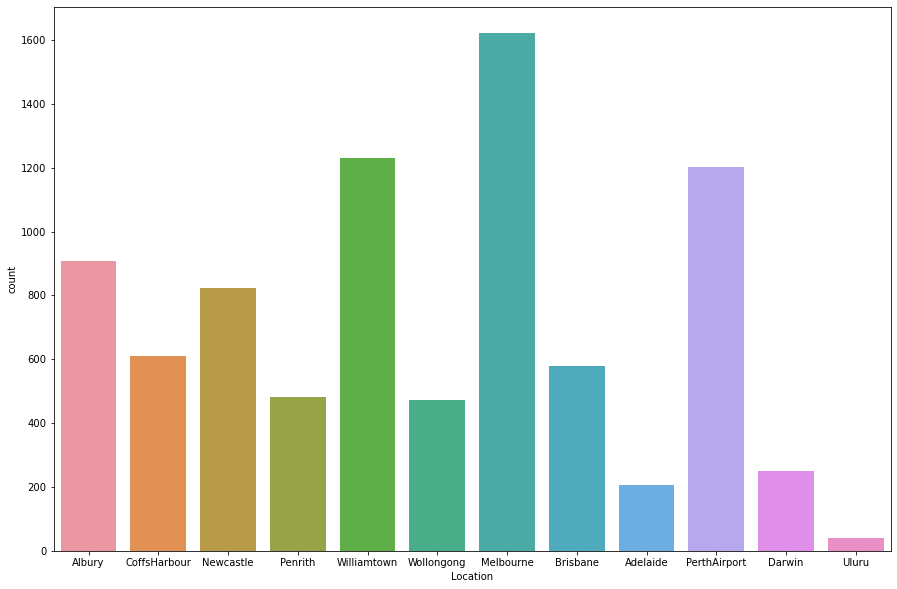

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(x='Location',data=df)
print(df['Location'].value_counts())

Text(0.5, 1.0, 'mintemp vs location')

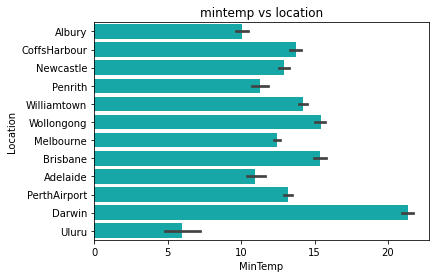

In [44]:
sns.barplot(x='MinTemp',y='Location',data=df,color='c',ci=95)
plt.title("mintemp vs location")

Text(0.5, 1.0, 'mintemp vs location')

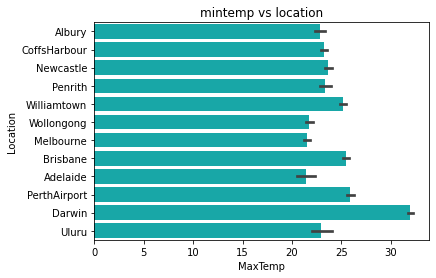

In [45]:
sns.barplot(x='MaxTemp',y='Location',data=df,color='c',ci=95)
plt.title("mintemp vs location")

Text(0.5, 1.0, 'rainfall vs location')

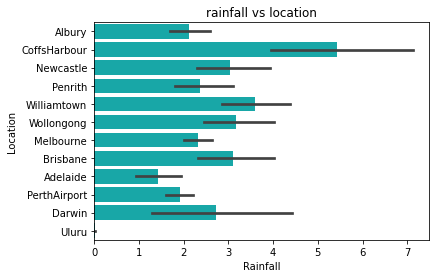

In [46]:
sns.barplot(x='Rainfall',y='Location',data=df,color='c',ci=95)
plt.title("rainfall vs location")

Text(0.5, 1.0, 'WindDir9am')

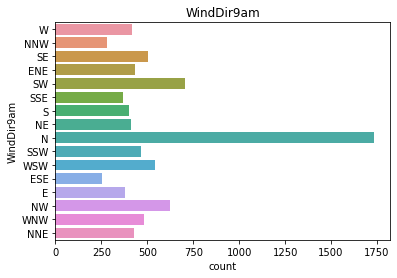

In [47]:
sns.countplot(y='WindDir9am',data=df)
plt.title("WindDir9am")

Text(0.5, 1.0, 'WindDir3pm')

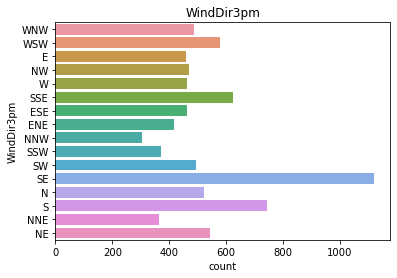

In [48]:
sns.countplot(y='WindDir3pm',data=df)
plt.title("WindDir3pm")

<AxesSubplot:xlabel='RainToday', ylabel='count'>

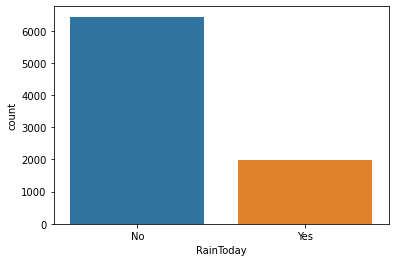

In [49]:
sns.countplot(x='RainToday',data=df)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

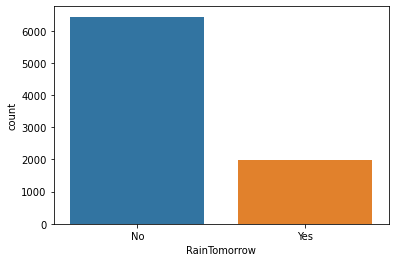

In [50]:
sns.countplot(x='RainTomorrow',data=df)

<AxesSubplot:xlabel='year', ylabel='Rainfall'>

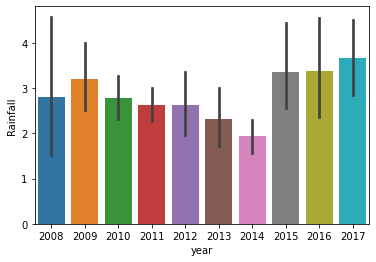

In [51]:
sns.barplot(y='Rainfall',x='year',data=df)

Text(0.5, 1.0, 'rainfall vs year and location')

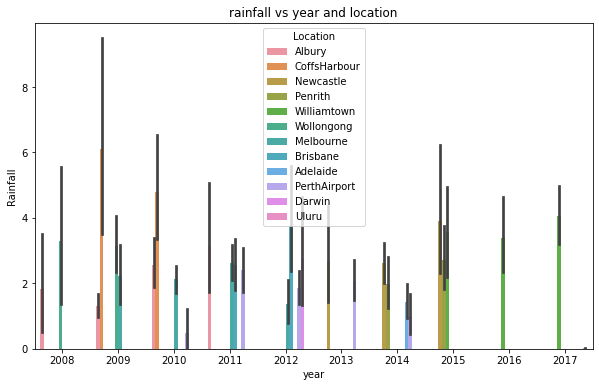

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(y='Rainfall',x='year',data=df,ci=95,hue="Location")
plt.title("rainfall vs year and location")

<AxesSubplot:xlabel='WindDir9am', ylabel='WindDir3pm'>

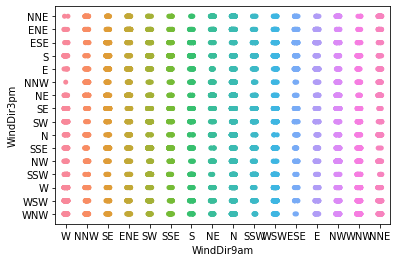

In [61]:
sns.stripplot(x ='WindDir9am', y ='WindDir3pm', data = df,
              jitter = True,  dodge = True)

<AxesSubplot:xlabel='WindDir9am', ylabel='WindDir3pm'>

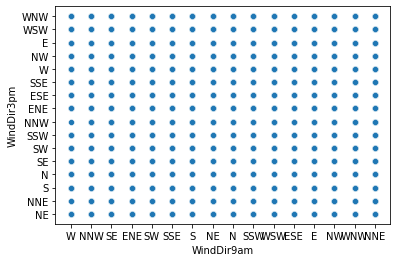

In [62]:
sns.scatterplot(x ='WindDir9am', y ='WindDir3pm', data = df)

<AxesSubplot:xlabel='MaxTemp', ylabel='RainToday'>

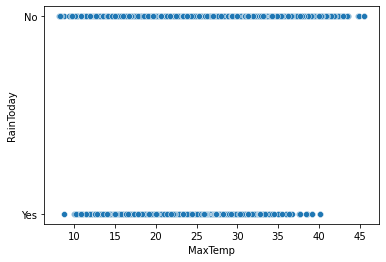

In [63]:
sns.scatterplot(x ='MaxTemp', y ='RainToday', data = df)

<AxesSubplot:xlabel='RainToday', ylabel='MaxTemp'>

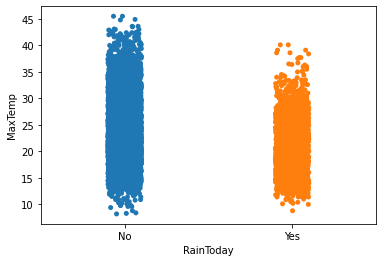

In [64]:
sns.stripplot(y ='MaxTemp', x ='RainToday', data = df,
              jitter = True,  dodge = True)

In [65]:
df['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

### Distribution Plots

In [66]:
df.shape

(8425, 25)

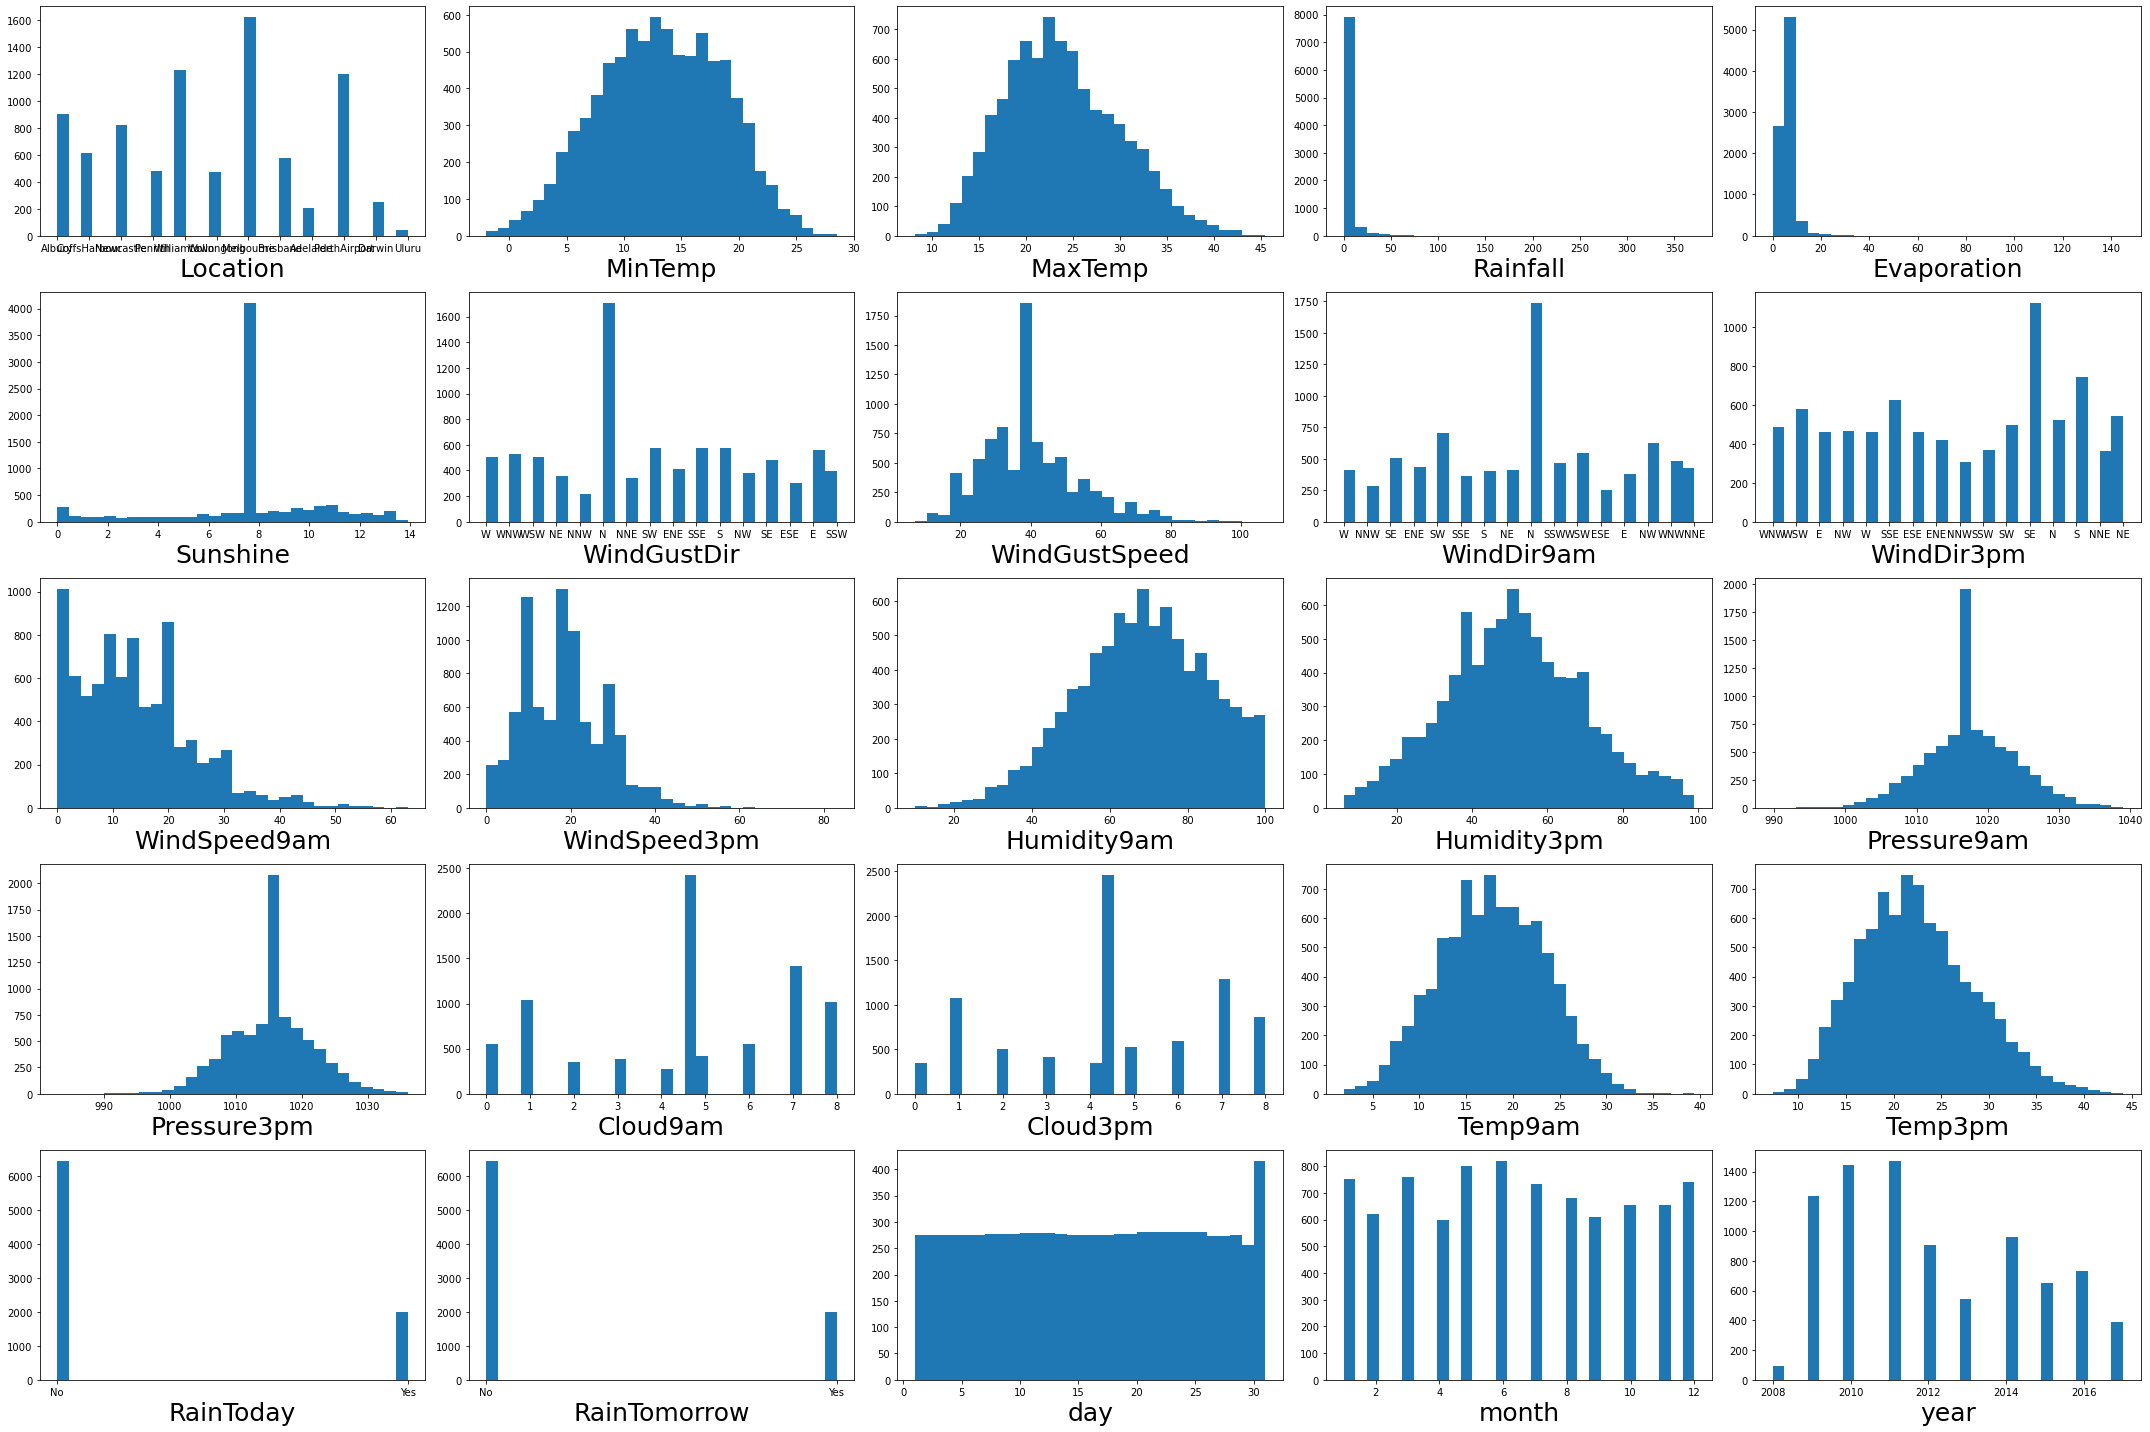

In [67]:
plt.figure(figsize=(30,20))
plotnumber=1

for column in df:
    if plotnumber<=25:
        ax = plt.subplot(5,5,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()    

In [68]:
df.drop(['Location','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [69]:
df.drop(['WindGustDir'],axis=1,inplace=True)

In [70]:
df

MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        13.4  22.900000       0.6     5.389395  7.632205      44.000000   
1         7.4  25.100000       0.0     5.389395  7.632205      44.000000   
2        12.9  25.700000       0.0     5.389395  7.632205      46.000000   
3         9.2  28.000000       0.0     5.389395  7.632205      24.000000   
4        17.5  32.300000       1.0     5.389395  7.632205      41.000000   
...       ...        ...       ...          ...       ...            ...   
8420      2.8  23.400000       0.0     5.389395  7.632205      31.000000   
8421      3.6  25.300000       0.0     5.389395  7.632205      22.000000   
8422      5.4  26.900000       0.0     5.389395  7.632205      37.000000   
8423      7.8  27.000000       0.0     5.389395  7.632205      28.000000   
8424     14.9  23.859976       0.0     5.389395  7.632205      40.174469   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Pressure3pm  \
0             20.0          24.0         71.0         22.0  ...       1007.1   
1              4.0          22.0         44.0         25.0  ...       1007.8   
2             19.0          26.0         38.0         30.0  ...       1008.7   
3             11.0           9.0         45.0         16.0  ...       1012.8   
4              7.0          20.0         82.0         33.0  ...       1006.0   
...            ...           ...          ...          ...  ...          ...   
8420          13.0          11.0         51.0         24.0  ...       1020.3   
8421          13.0           9.0         56.0         21.0  ...       1019.1   
8422           9.0           9.0         53.0         24.0  ...       1016.8   
8423          13.0           7.0         51.0         24.0  ...       1016.5   
8424          17.0          17.0         62.0         36.0  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday RainTomorrow day  month  \
0     8.000000  4.503183     16.9     21.8         No           No   1     12   
1     4.566622  4.503183     17.2     24.3         No           No   2     12   
2     4.566622  2.000000     21.0     23.2         No           No   3     12   
3     4.566622  4.503183     18.1     26.5         No           No   4     12   
4     7.000000  8.000000     17.8     29.7         No           No   5     12   
...        ...       ...      ...      ...        ...          ...  ..    ...   
8420  4.566622  4.503183     10.1     22.4         No           No  21      6   
8421  4.566622  4.503183     10.9     24.5         No           No  22      6   
8422  4.566622  4.503183     12.5     26.1         No           No  23      6   
8423  3.000000  2.000000     15.1     26.0         No           No  24      6   
8424  8.000000  8.000000     15.0     20.9         No           No  25      6   

      year  
0     2008  
1     2008  
2     2008  
3     2008  
4     2008  
...    ...  
8420  2017  
8421  2017  
8422  2017  
8423  2017  
8424  2017  

[8425 rows x 21 columns]

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [72]:
df['RainToday'] = le.fit_transform(df['RainToday']) 

In [73]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [74]:
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [75]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [76]:
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6     5.389395  7.632205           44.0   
1      7.4     25.1       0.0     5.389395  7.632205           44.0   
2     12.9     25.7       0.0     5.389395  7.632205           46.0   
3      9.2     28.0       0.0     5.389395  7.632205           24.0   
4     17.5     32.3       1.0     5.389395  7.632205           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Pressure3pm  \
0          20.0          24.0         71.0         22.0  ...       1007.1   
1           4.0          22.0         44.0         25.0  ...       1007.8   
2          19.0          26.0         38.0         30.0  ...       1008.7   
3          11.0           9.0         45.0         16.0  ...       1012.8   
4           7.0          20.0         82.0         33.0  ...       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  \
0  8.000000  4.503183     16.9     21.8          0             0    1     12   
1  4.566622  4.503183     17.2     24.3          0             0    2     12   
2  4.566622  2.000000     21.0     23.2          0             0    3     12   
3  4.566622  4.503183     18.1     26.5          0             0    4     12   
4  7.000000  8.000000     17.8     29.7          0             0    5     12   

   year  
0  2008  
1  2008  
2  2008  
3  2008  
4  2008  

[5 rows x 21 columns]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        8425 non-null   float64
 1   MaxTemp        8425 non-null   float64
 2   Rainfall       8425 non-null   float64
 3   Evaporation    8425 non-null   float64
 4   Sunshine       8425 non-null   float64
 5   WindGustSpeed  8425 non-null   float64
 6   WindSpeed9am   8425 non-null   float64
 7   WindSpeed3pm   8425 non-null   float64
 8   Humidity9am    8425 non-null   float64
 9   Humidity3pm    8425 non-null   float64
 10  Pressure9am    8425 non-null   float64
 11  Pressure3pm    8425 non-null   float64
 12  Cloud9am       8425 non-null   float64
 13  Cloud3pm       8425 non-null   float64
 14  Temp9am        8425 non-null   float64
 15  Temp3pm        8425 non-null   float64
 16  RainToday      8425 non-null   int32  
 17  RainTomorrow   8425 non-null   int32  
 18  day     

### Checking the target variable has imbalance data

In [78]:
from sklearn.utils import resample

In [79]:
df_majority = df[(df['RainTomorrow']==0)] 
df_minority = df[(df['RainTomorrow']==1)]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 6434, 
                                 random_state=42)  
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [80]:
df_upsampled['RainTomorrow'].value_counts()

1    6434
0    6434
Name: RainTomorrow, dtype: int64

In [81]:
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6     5.389395  7.632205           44.0   
1      7.4     25.1       0.0     5.389395  7.632205           44.0   
2     12.9     25.7       0.0     5.389395  7.632205           46.0   
3      9.2     28.0       0.0     5.389395  7.632205           24.0   
4     17.5     32.3       1.0     5.389395  7.632205           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Pressure3pm  \
0          20.0          24.0         71.0         22.0  ...       1007.1   
1           4.0          22.0         44.0         25.0  ...       1007.8   
2          19.0          26.0         38.0         30.0  ...       1008.7   
3          11.0           9.0         45.0         16.0  ...       1012.8   
4           7.0          20.0         82.0         33.0  ...       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  \
0  8.000000  4.503183     16.9     21.8          0             0    1     12   
1  4.566622  4.503183     17.2     24.3          0             0    2     12   
2  4.566622  2.000000     21.0     23.2          0             0    3     12   
3  4.566622  4.503183     18.1     26.5          0             0    4     12   
4  7.000000  8.000000     17.8     29.7          0             0    5     12   

   year  
0  2008  
1  2008  
2  2008  
3  2008  
4  2008  

[5 rows x 21 columns]

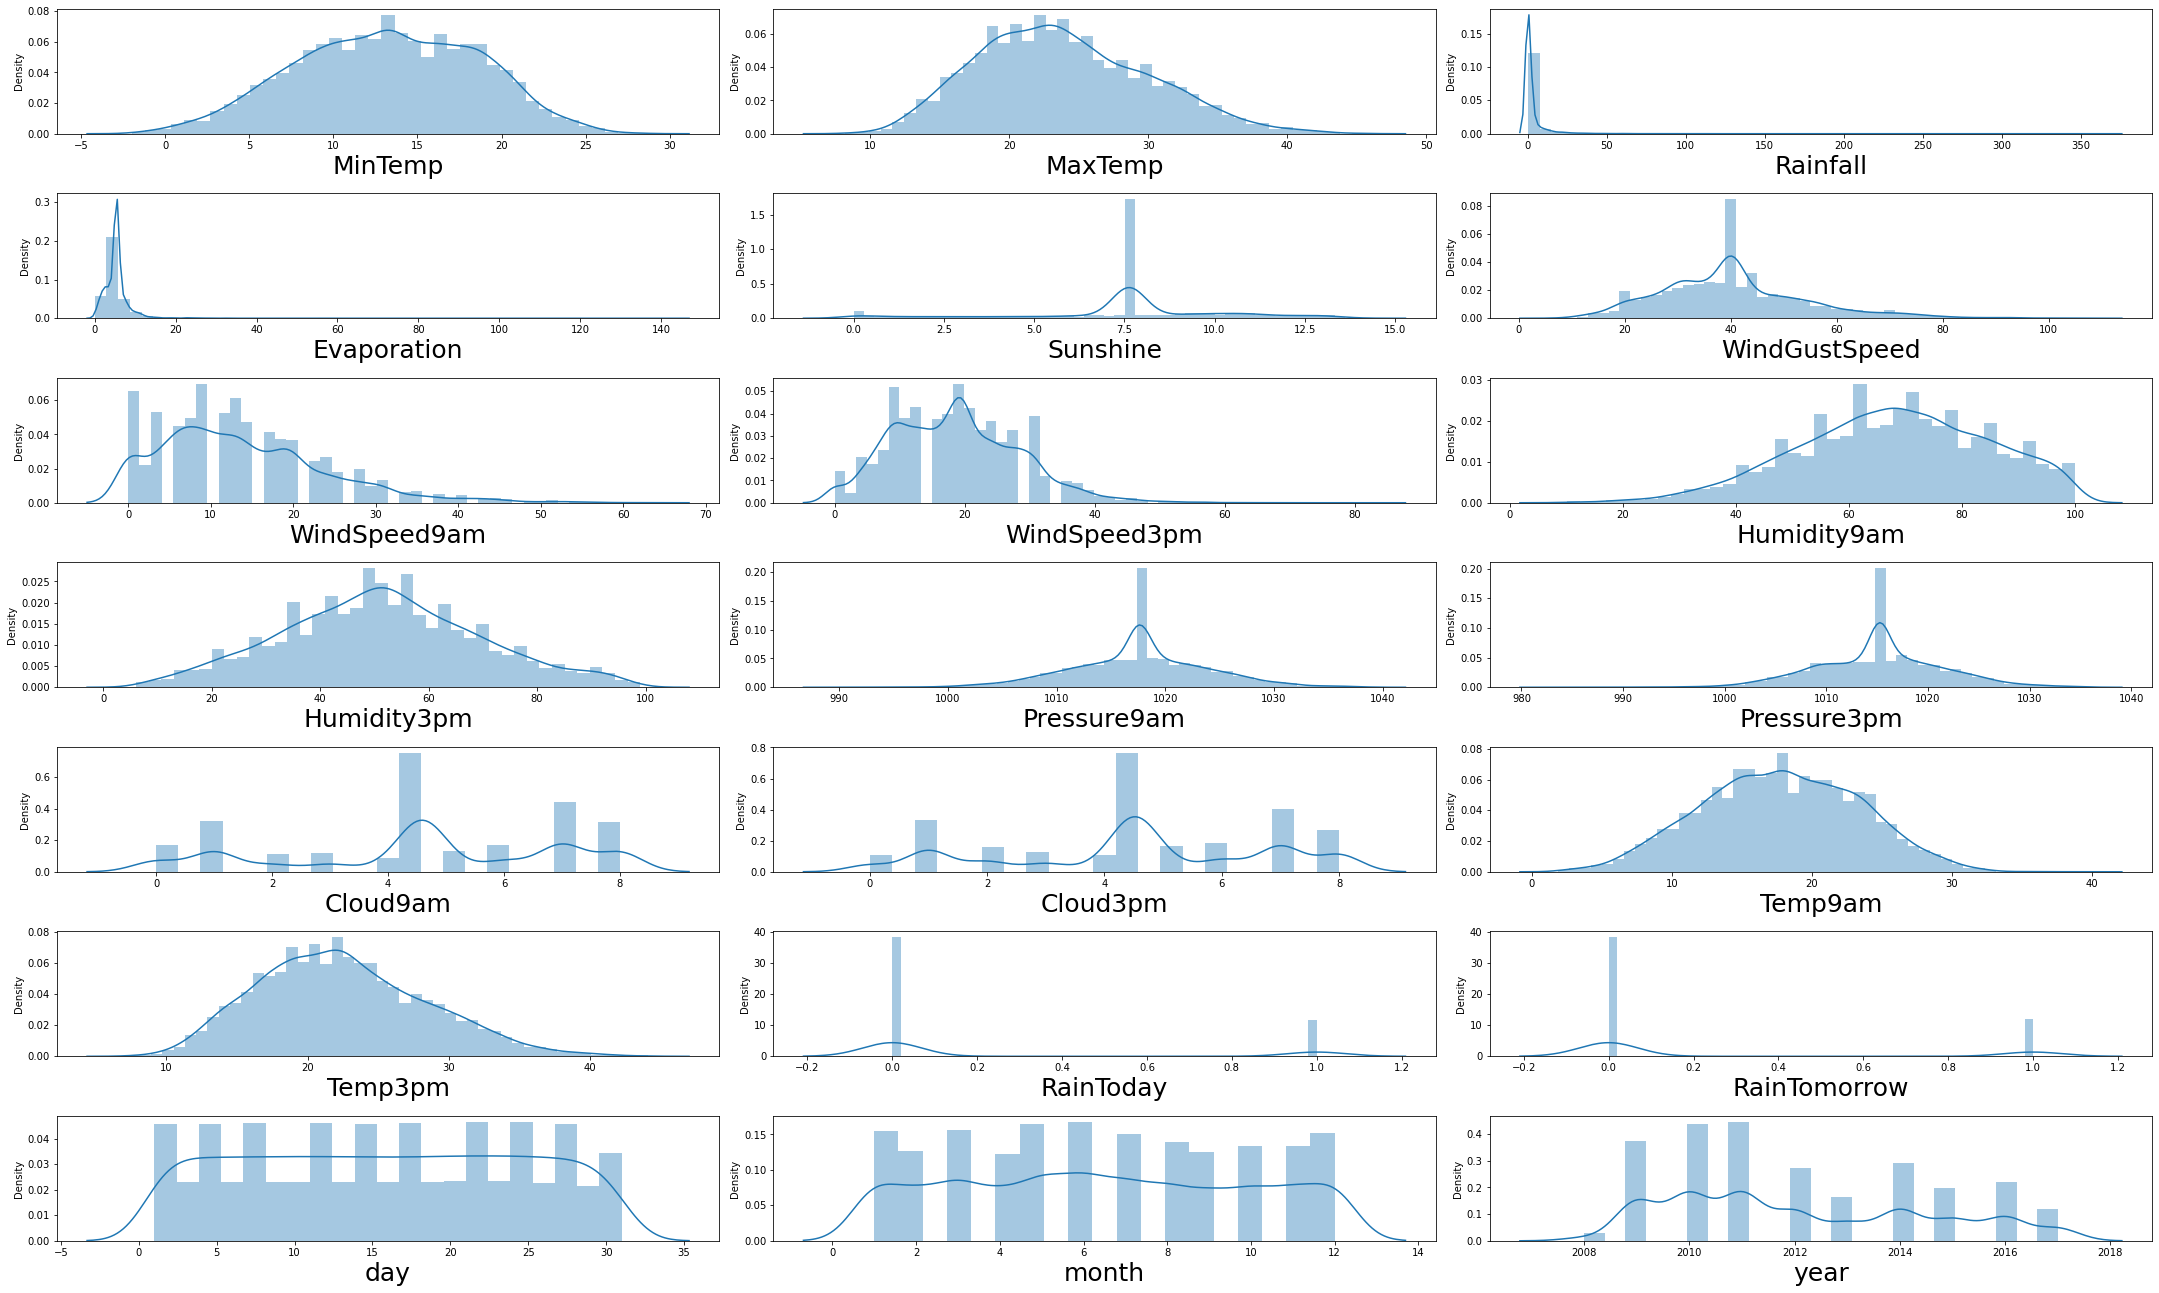

In [82]:
plt.figure(figsize=(30,20))
plotnumber=1

for column in df:
    if plotnumber<=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()  

<Figure size 1080x1080 with 0 Axes>

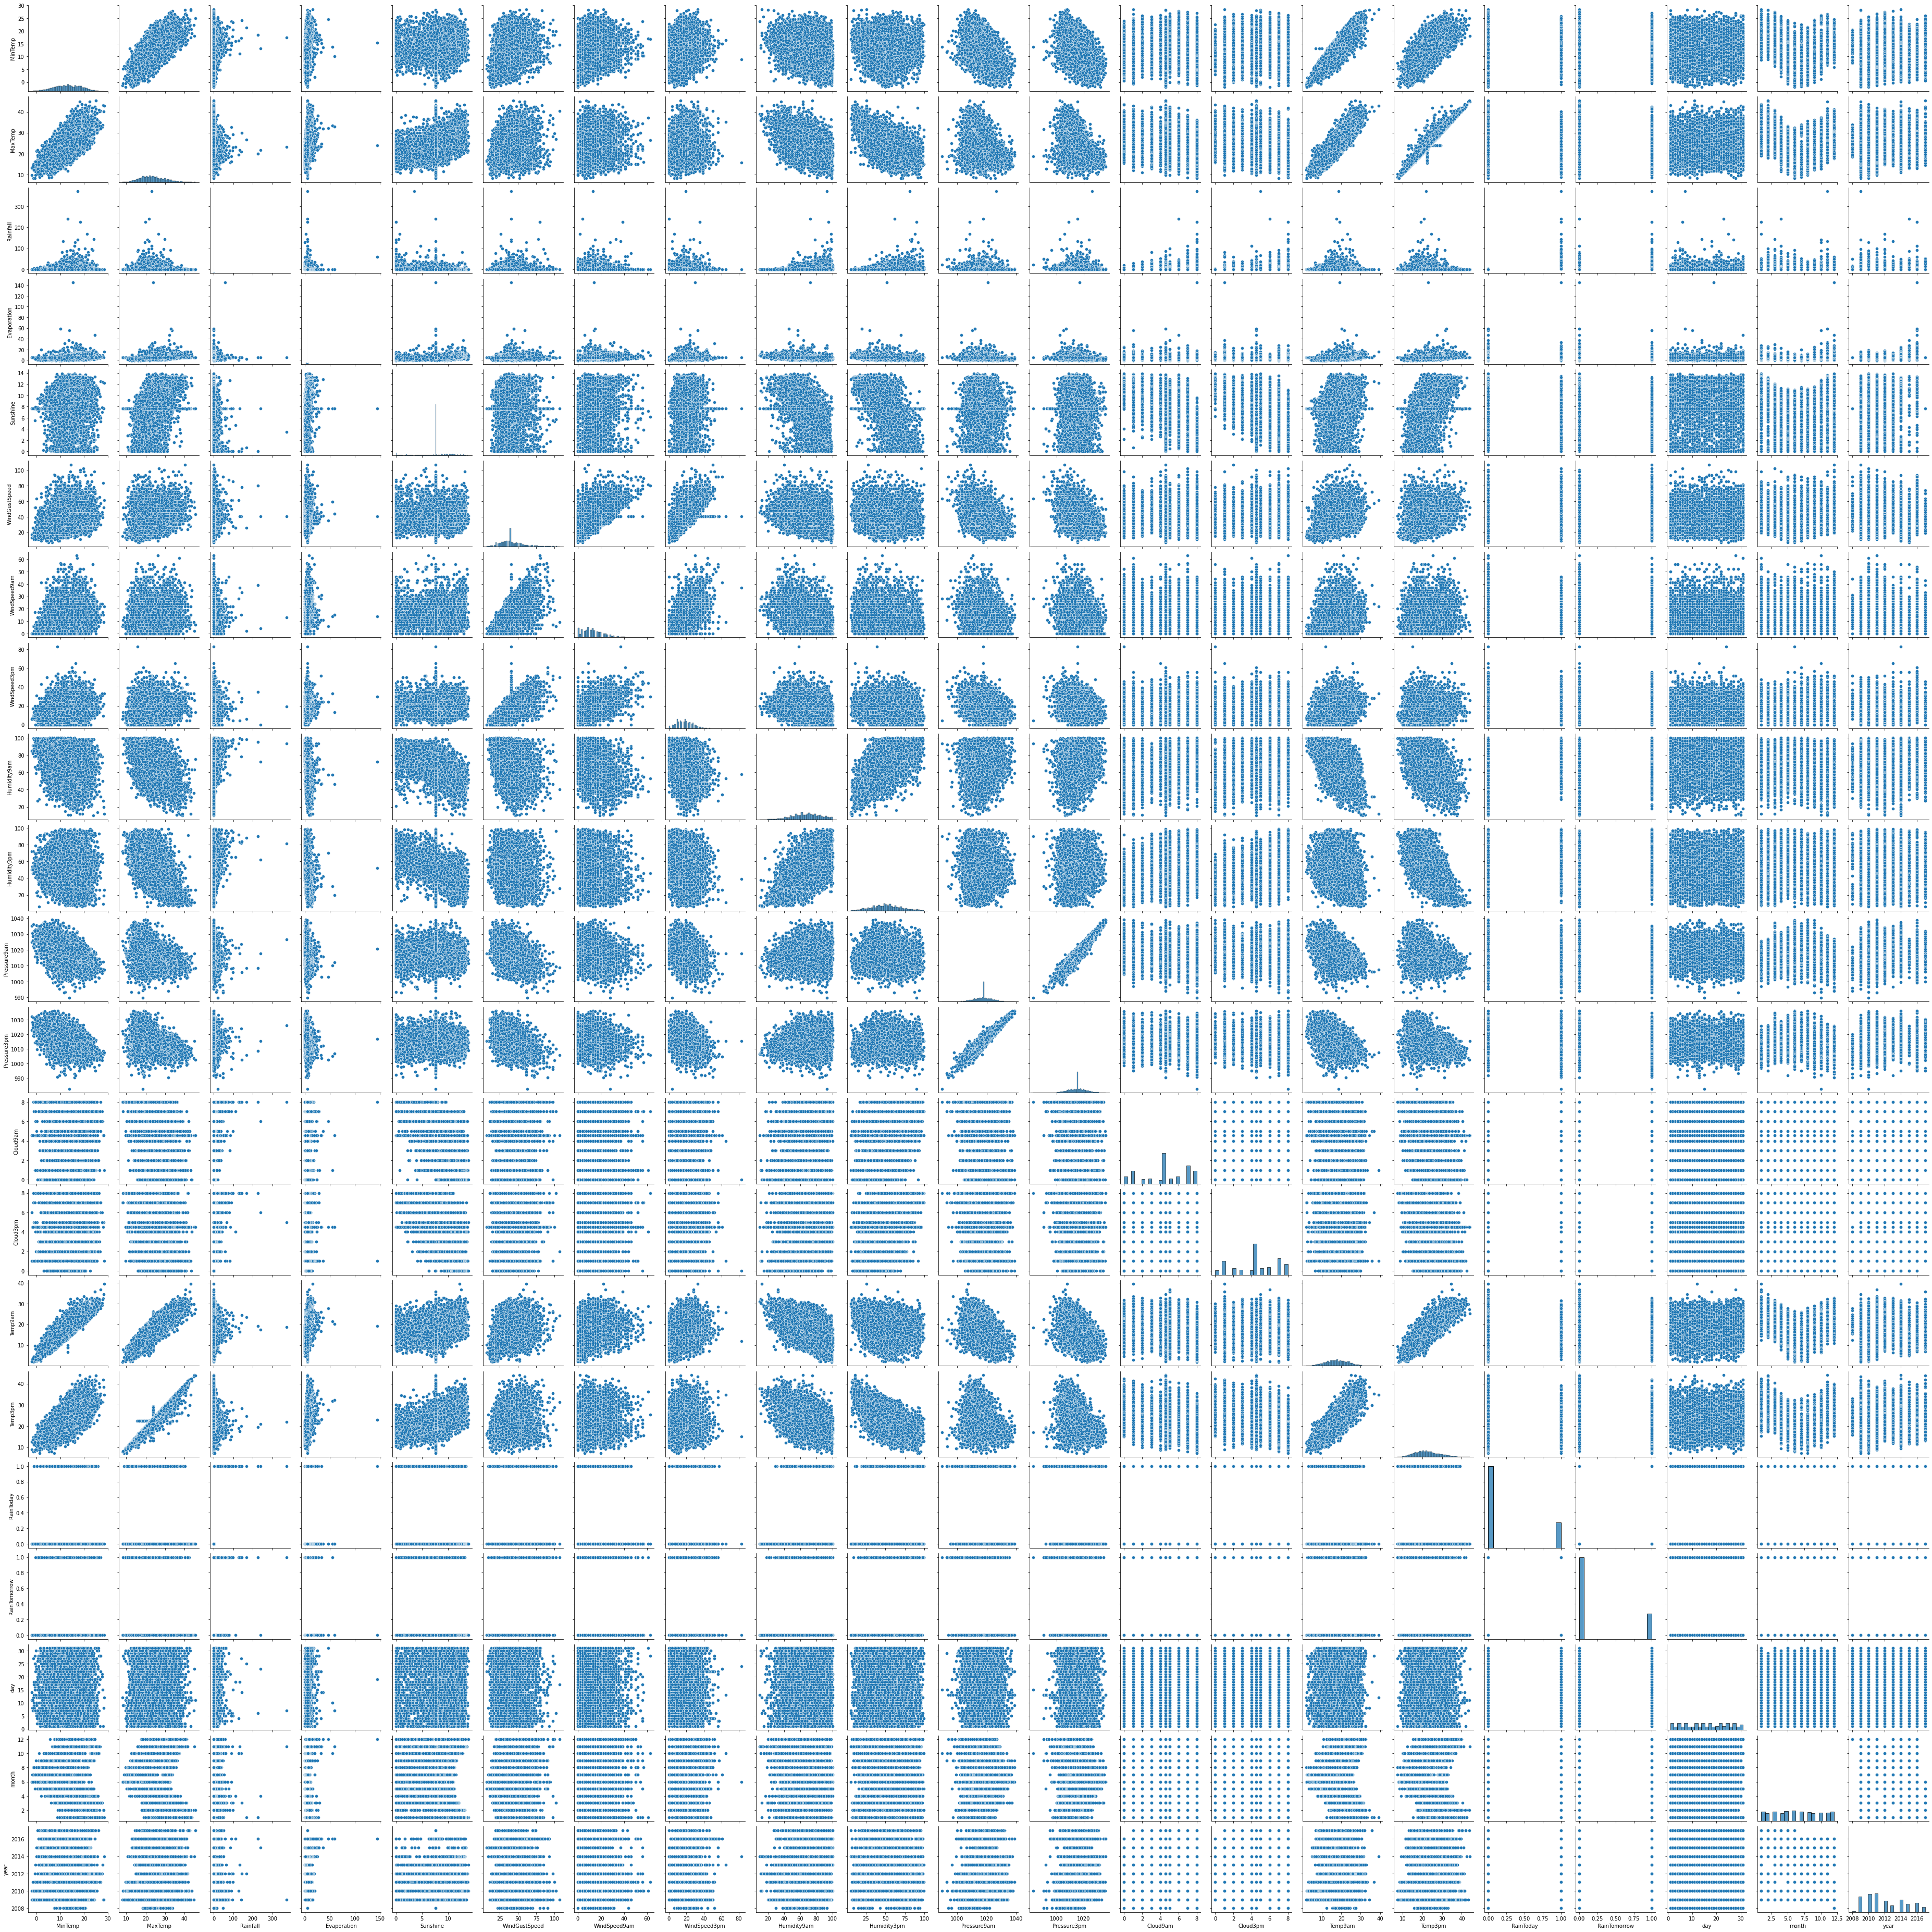

In [83]:
plt.figure(figsize=(15,15))
sns.pairplot(df , palette ='coolwarm')

### Checking the skew

In [84]:
df.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
day               0.004260
month             0.039388
year              0.418663
dtype: float64

In [85]:
sk = df.skew()

In [86]:
sk[np.abs(sk)<0.5].all()

True

In [87]:
df['Rainfall'] =np.sqrt(df['Rainfall'])

In [88]:
df['Evaporation'] = np.sqrt(df['Evaporation'])

In [89]:
df['WindGustSpeed'] = np.sqrt(df['WindGustSpeed'])

In [90]:
df['WindSpeed9am'] = np.sqrt(df['WindSpeed9am'])

In [91]:
df.skew()

MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         2.880118
Evaporation      1.645178
Sunshine        -0.716525
WindGustSpeed    0.176622
WindSpeed9am    -0.414330
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
RainTomorrow     1.241588
day              0.004260
month            0.039388
year             0.418663
dtype: float64

In [92]:
sk1 = df.skew()

In [93]:
sk1[np.abs(sk1)<0.5].all()

True

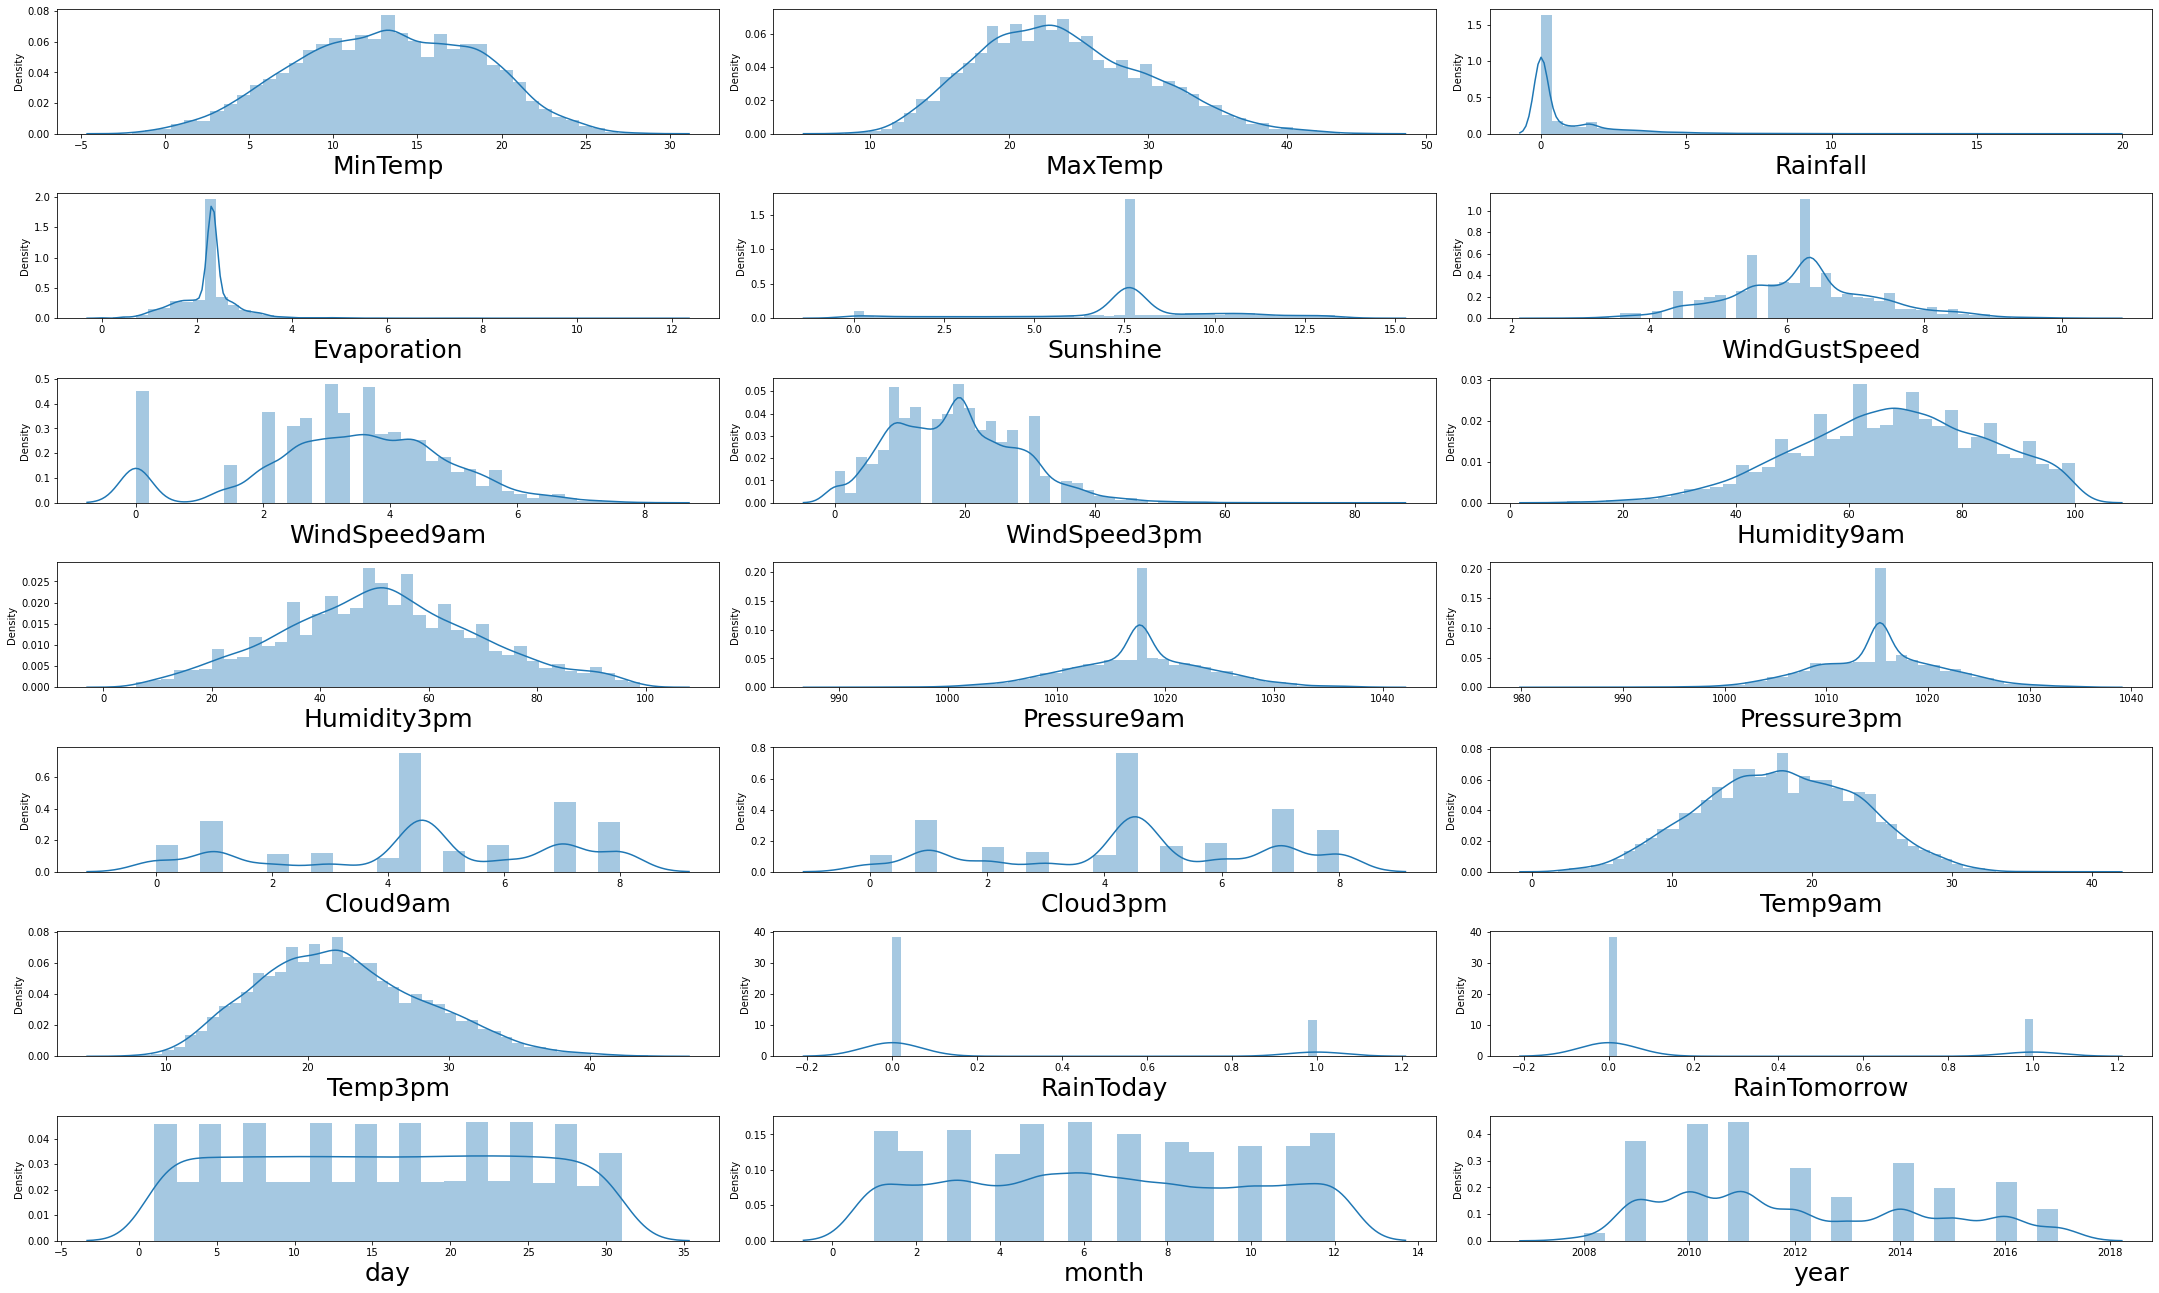

In [94]:
plt.figure(figsize=(30,20))
plotnumber=1

for column in df:
    if plotnumber<=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()

In [95]:
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9  0.774597     2.321507  7.632205       6.633250   
1      7.4     25.1  0.000000     2.321507  7.632205       6.633250   
2     12.9     25.7  0.000000     2.321507  7.632205       6.782330   
3      9.2     28.0  0.000000     2.321507  7.632205       4.898979   
4     17.5     32.3  1.000000     2.321507  7.632205       6.403124   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Pressure3pm  \
0      4.472136          24.0         71.0         22.0  ...       1007.1   
1      2.000000          22.0         44.0         25.0  ...       1007.8   
2      4.358899          26.0         38.0         30.0  ...       1008.7   
3      3.316625           9.0         45.0         16.0  ...       1012.8   
4      2.645751          20.0         82.0         33.0  ...       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  \
0  8.000000  4.503183     16.9     21.8          0             0    1     12   
1  4.566622  4.503183     17.2     24.3          0             0    2     12   
2  4.566622  2.000000     21.0     23.2          0             0    3     12   
3  4.566622  4.503183     18.1     26.5          0             0    4     12   
4  7.000000  8.000000     17.8     29.7          0             0    5     12   

   year  
0  2008  
1  2008  
2  2008  
3  2008  
4  2008  

[5 rows x 21 columns]

# check the outliers


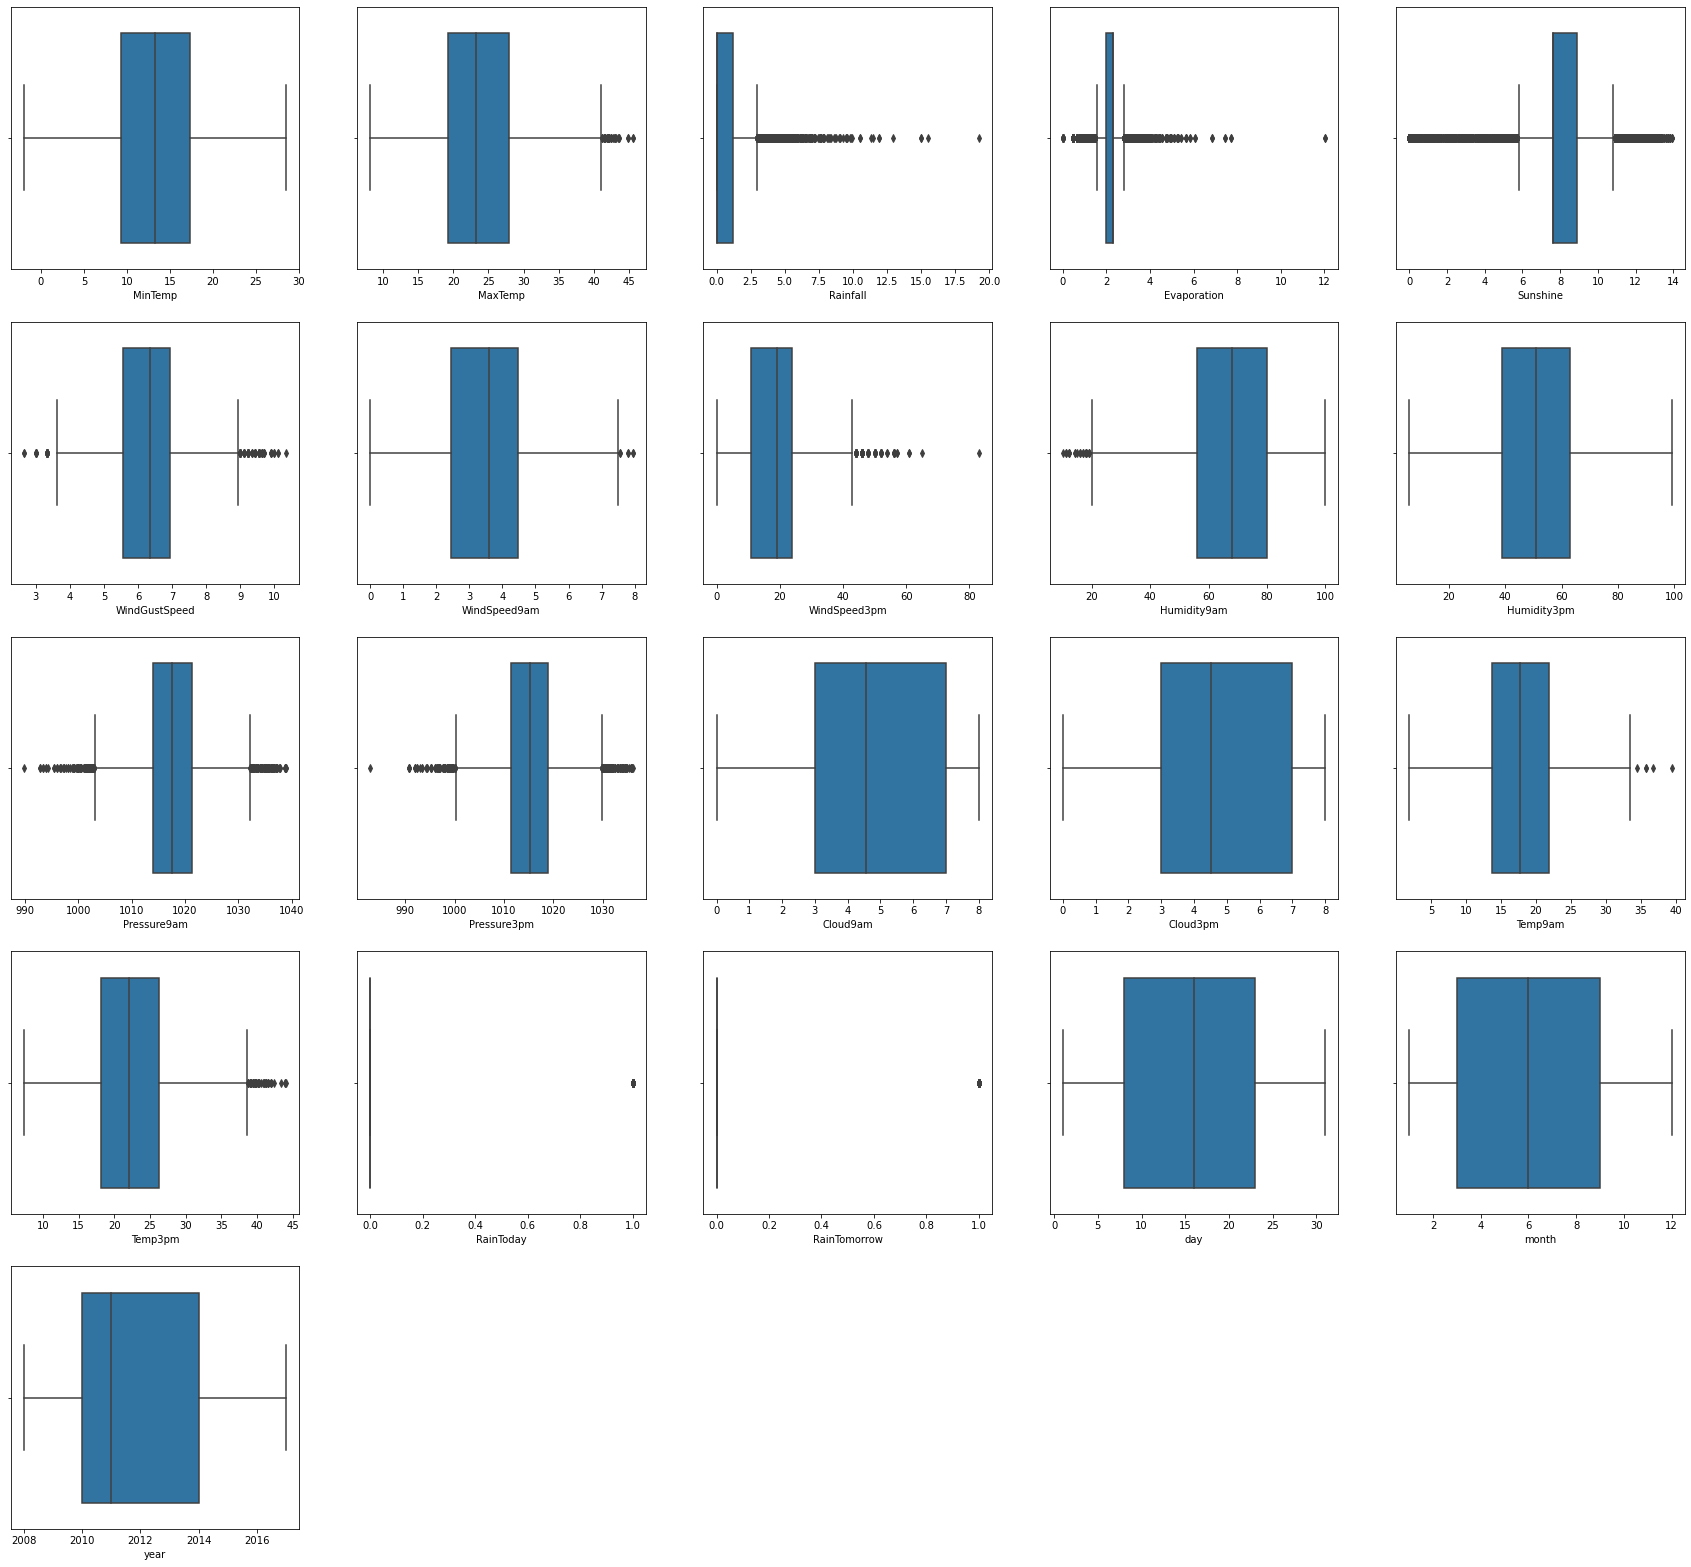

In [96]:
plt.figure(figsize=(30,28))
graph = 1
for column in df:
    if graph<=25:
        ax = plt.subplot(5,5,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

From above plotting we can see that there is many columns have outliers

So,We need to treat outliers

### Using Z Score method to removing outliers

In [97]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z.shape

(8425, 21)

In [98]:
threshold = 3
print(np.where(z>3))

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   67,   68,   68,  123,  296,  296,  381,  381,  405,  406,
        407,  407,  431,  462,  544,  563,  568,  568,  569,  602,  683,
        683,  684,  699,  713,  748,  748,  770,  796,  797,  802,  803,
        928,  935,  949,  951,  979,  980, 1008, 1009, 1011, 1138, 1148,
       1149, 1151, 1187, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357,
       1358, 1387, 1411, 1412, 1413, 1479, 1480, 1481, 1501, 1513, 1514,
       1587, 1644, 1661, 1665, 1673, 1680, 1774, 1782, 1811, 1819, 1873,
       1898, 1954, 2028, 2043, 2063, 2108, 2116, 2182, 2183, 2201, 2211,
       2219, 2230, 2231, 2265, 2346, 2373, 2389, 2429, 2488, 2505, 2510,
       2527, 2527, 2541, 2593, 2676, 2677, 2710, 2735, 2738, 2743, 2744,
       2768, 2827, 2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883,
       2886, 2890, 2891, 2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919,
       2925, 2933, 2939, 2947, 2953, 2961, 2967, 2

In [99]:
data_new = df[(z<3).all(axis = 1)]
print(df.shape)
print(data_new.shape)

(8425, 21)
(8000, 21)


In [100]:
loss_percent = (8425-8115)/8115*100
print(loss_percent)

3.820086260012323


In [101]:
data_new.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
day              0
month            0
year             0
dtype: int64

In [102]:
data_new.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9  0.774597     2.321507  7.632205       6.633250   
1      7.4     25.1  0.000000     2.321507  7.632205       6.633250   
2     12.9     25.7  0.000000     2.321507  7.632205       6.782330   
3      9.2     28.0  0.000000     2.321507  7.632205       4.898979   
4     17.5     32.3  1.000000     2.321507  7.632205       6.403124   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Pressure3pm  \
0      4.472136          24.0         71.0         22.0  ...       1007.1   
1      2.000000          22.0         44.0         25.0  ...       1007.8   
2      4.358899          26.0         38.0         30.0  ...       1008.7   
3      3.316625           9.0         45.0         16.0  ...       1012.8   
4      2.645751          20.0         82.0         33.0  ...       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  \
0  8.000000  4.503183     16.9     21.8          0             0    1     12   
1  4.566622  4.503183     17.2     24.3          0             0    2     12   
2  4.566622  2.000000     21.0     23.2          0             0    3     12   
3  4.566622  4.503183     18.1     26.5          0             0    4     12   
4  7.000000  8.000000     17.8     29.7          0             0    5     12   

   year  
0  2008  
1  2008  
2  2008  
3  2008  
4  2008  

[5 rows x 21 columns]

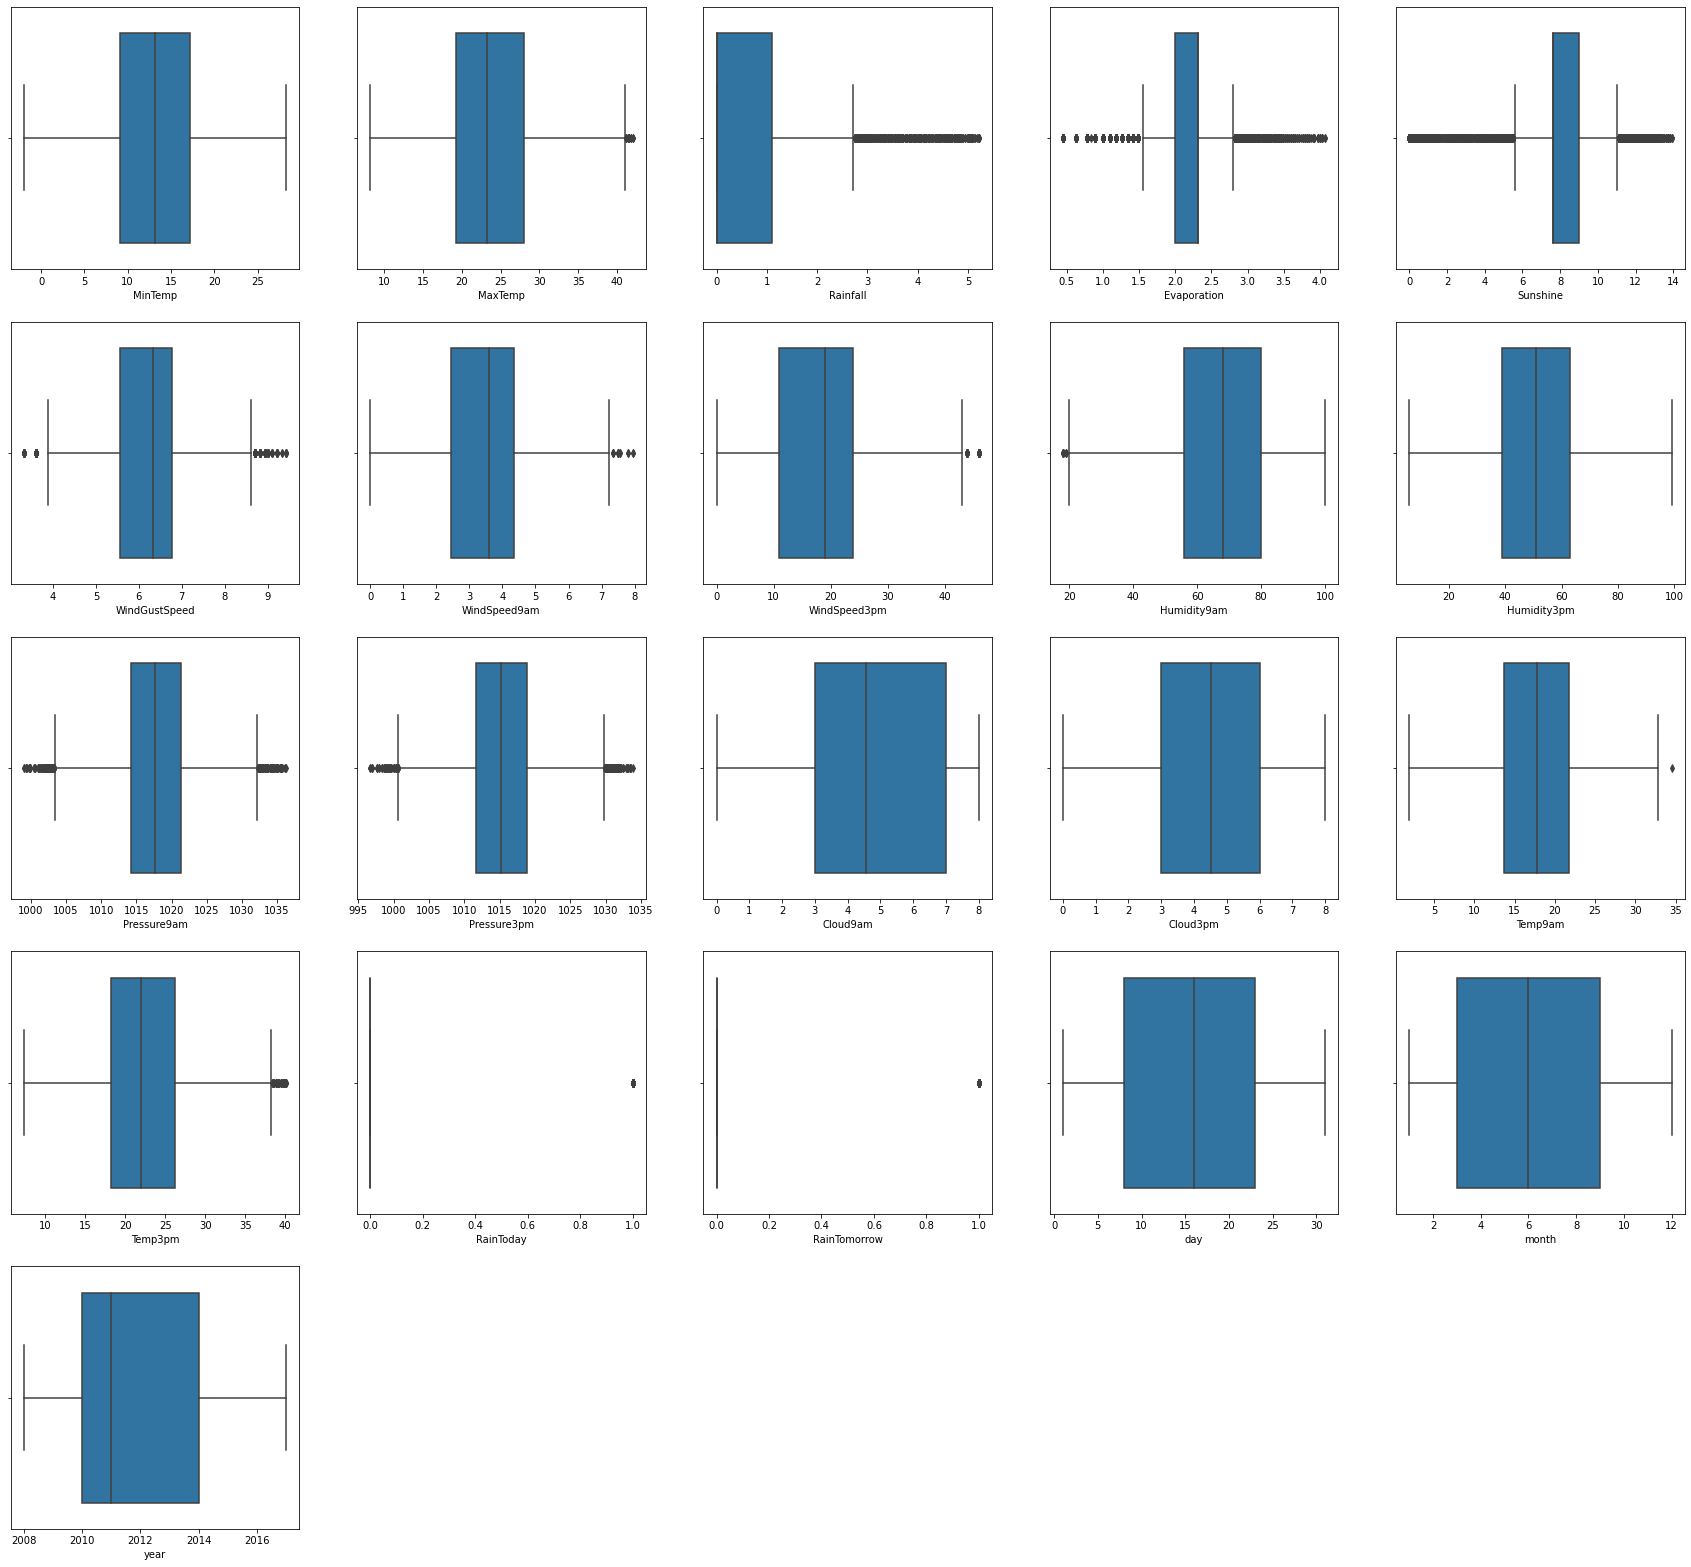

In [103]:
plt.figure(figsize=(30,28))
graph = 1
for column in data_new:
    if graph<=25:
        ax = plt.subplot(5,5,graph)
        sns.boxplot(data_new[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

### check the static analysis

In [104]:
data_new.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.719201  0.079702     0.370872  0.066602   
MaxTemp        0.719201  1.000000 -0.207629     0.468849  0.386026   
Rainfall       0.079702 -0.207629  1.000000    -0.164003 -0.232750   
Evaporation    0.370872  0.468849 -0.164003     1.000000  0.375537   
Sunshine       0.066602  0.386026 -0.232750     0.375537  1.000000   
WindGustSpeed  0.243466  0.151812  0.089452     0.186844  0.014991   
WindSpeed9am   0.168446  0.033547  0.039235     0.072794 -0.005693   
WindSpeed3pm   0.184760  0.093348  0.036397     0.090168  0.042826   
Humidity9am   -0.130782 -0.381709  0.375775    -0.315327 -0.358134   
Humidity3pm    0.083903 -0.411977  0.350935    -0.226172 -0.435673   
Pressure9am   -0.430369 -0.331303 -0.116787    -0.262488  0.002900   
Pressure3pm   -0.424100 -0.410280 -0.039907    -0.275559 -0.055034   
Cloud9am       0.084669 -0.254193  0.276918    -0.110102 -0.528874   
Cloud3pm       0.033264 -0.248609  0.235242    -0.138877 -0.543061   
Temp9am        0.888180  0.865133 -0.084055     0.439497  0.260023   
Temp3pm        0.688129  0.974901 -0.217348     0.455699  0.402699   
RainToday      0.055235 -0.219925  0.849608    -0.167926 -0.215733   
RainTomorrow   0.087392 -0.148004  0.309899    -0.084717 -0.316223   
day            0.013595  0.020148 -0.016186     0.011516  0.004937   
month         -0.244441 -0.164403  0.015075    -0.051340 -0.005594   
year           0.038166  0.117987  0.015270     0.136649  0.056151   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.243466      0.168446      0.184760    -0.130782   
MaxTemp             0.151812      0.033547      0.093348    -0.381709   
Rainfall            0.089452      0.039235      0.036397     0.375775   
Evaporation         0.186844      0.072794      0.090168    -0.315327   
Sunshine            0.014991     -0.005693      0.042826    -0.358134   
WindGustSpeed       1.000000      0.525975      0.638663    -0.289083   
WindSpeed9am        0.525975      1.000000      0.548855    -0.378678   
WindSpeed3pm        0.638663      0.548855      1.000000    -0.253690   
Humidity9am        -0.289083     -0.378678     -0.253690     1.000000   
Humidity3pm        -0.101485     -0.104922     -0.087971     0.625132   
Pressure9am        -0.380518     -0.156390     -0.236651     0.140942   
Pressure3pm        -0.341706     -0.119492     -0.187130     0.171253   
Cloud9am            0.005142     -0.008264      0.002478     0.398158   
Cloud3pm            0.063573      0.041073      0.001611     0.291988   
Temp9am             0.216913      0.145952      0.189320    -0.372059   
Temp3pm             0.118030      0.016930      0.071543    -0.375149   
RainToday           0.066035      0.029984      0.016679     0.355391   
RainTomorrow        0.170281      0.058448      0.045283     0.259531   
day                 0.000419     -0.008198     -0.008026     0.005238   
month               0.051314      0.036760      0.040194    -0.112134   
year               -0.027226     -0.108711     -0.063818     0.106736   

               Humidity3pm  ...  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
MinTemp           0.083903  ...    -0.424100  0.084669  0.033264  0.888180   
MaxTemp          -0.411977  ...    -0.410280 -0.254193 -0.248609  0.865133   
Rainfall          0.350935  ...    -0.039907  0.276918  0.235242 -0.084055   
Evaporation      -0.226172  ...    -0.275559 -0.110102 -0.138877  0.439497   
Sunshine         -0.435673  ...    -0.055034 -0.528874 -0.543061  0.260023   
WindGustSpeed    -0.101485  ...    -0.341706  0.005142  0.063573  0.216913   
WindSpeed9am     -0.104922  ...    -0.119492 -0.008264  0.041073  0.145952   
WindSpeed3pm     -0.087971  ...    -0.187130  0.002478  0.001611  0.189320   
Humidity9am       0.625132  ...     0.171253  0.398158  0.291988 -0.372059   
Humidity3pm       1.000000  ...     0.066116  0.411736  0.431974 -0.119790   
Pressure9a

<AxesSubplot:>

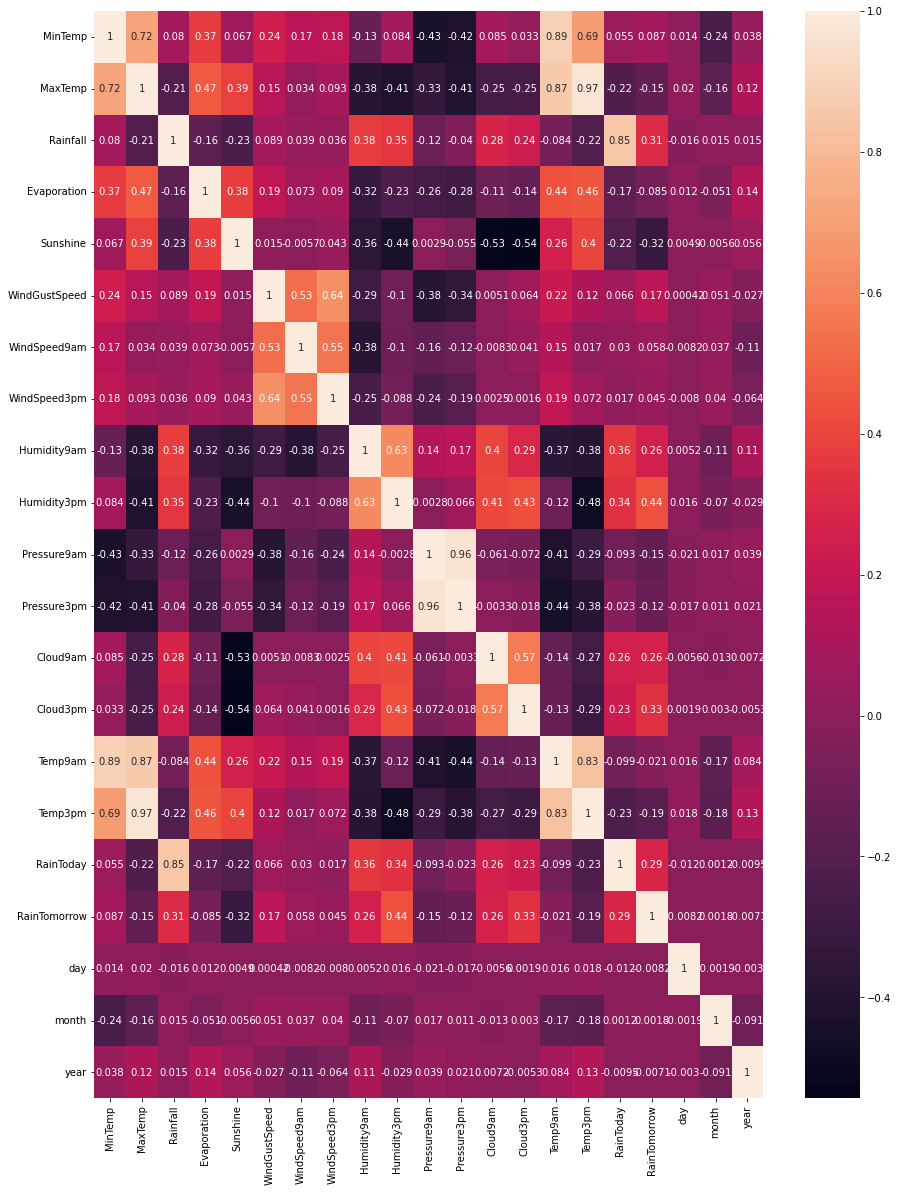

In [105]:
plt.figure(figsize=(15,20))
sns.heatmap(data_new.corr(),annot=True)

### data split testing and traning phase

In [106]:
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [107]:
x.drop(['Temp3pm','Pressure9am','MaxTemp'],axis=1,inplace=True)

### preprocessing

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
sc = StandardScaler()

In [110]:
x_scaled = sc.fit_transform(x)

In [111]:
x_scaled.shape[1]

17

In [112]:
vif = pd.DataFrame()

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [114]:
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [115]:
vif['features'] = x.columns

In [116]:
vif

vif       features
0   8.276162        MinTemp
1   2.790159       Rainfall
2   1.403383    Evaporation
3   1.880388       Sunshine
4   2.149904  WindGustSpeed
5   1.826569   WindSpeed9am
6   1.924086   WindSpeed3pm
7   3.061264    Humidity9am
8   2.107283    Humidity3pm
9   1.423552    Pressure3pm
10  1.919127       Cloud9am
11  1.801659       Cloud3pm
12  9.184428        Temp9am
13  2.747829      RainToday
14  1.001521            day
15  1.133167          month
16  1.126117           year

In [117]:
x.head()

MinTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     13.4  0.774597     2.321507  7.632205       6.633250      4.472136   
1      7.4  0.000000     2.321507  7.632205       6.633250      2.000000   
2     12.9  0.000000     2.321507  7.632205       6.782330      4.358899   
3      9.2  0.000000     2.321507  7.632205       4.898979      3.316625   
4     17.5  1.000000     2.321507  7.632205       6.403124      2.645751   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  \
0          24.0         71.0         22.0       1007.1  8.000000  4.503183   
1          22.0         44.0         25.0       1007.8  4.566622  4.503183   
2          26.0         38.0         30.0       1008.7  4.566622  2.000000   
3           9.0         45.0         16.0       1012.8  4.566622  4.503183   
4          20.0         82.0         33.0       1006.0  7.000000  8.000000   

   Temp9am  RainToday  day  month  year  
0     16.9          0    1     12  2008  
1     17.2          0    2     12  2008  
2     21.0          0    3     12  2008  
3     18.1          0    4     12  2008  
4     17.8          0    5     12  2008

# features selection


In [118]:
from sklearn.feature_selection import SelectKBest,f_classif

In [119]:
best_features = SelectKBest(score_func=f_classif,k=17)
fit = best_features.fit(x,y)
x_scores = pd.DataFrame(fit.scores_)
x_columns = pd.DataFrame(x.columns)

In [120]:
feature_scores = pd.concat([x_scores,x_columns],axis=1)
feature_scores.columns = ['Score','Feature_Name']#put the column nme

In [121]:
print(feature_scores.nlargest(17,'Score'))

          Score   Feature_Name
8   2077.580374    Humidity3pm
11  1133.279550       Cloud3pm
3   1013.558821       Sunshine
1   1010.994442       Rainfall
13   914.359293      RainToday
10   710.684993       Cloud9am
7    668.806828    Humidity9am
4    293.095720  WindGustSpeed
9    156.930342    Pressure3pm
0     73.393560        MinTemp
2     50.343025    Evaporation
5     35.026406   WindSpeed9am
6     24.239735   WindSpeed3pm
12     4.540288        Temp9am
14     2.013973            day
16     1.031535           year
15     0.013013          month


# model selection and find random state


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [123]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.30, random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum accuracy score is ",maxAccu," on Random_state ",maxRS)

Maximum accuracy score is  0.8457278481012658  on Random_state  63


In [124]:
confusion_mat = confusion_matrix(y_test,pred)

In [125]:
confusion_mat

array([[1817,  113],
       [ 325,  273]], dtype=int64)

In [126]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1930
           1       0.71      0.46      0.55       598

    accuracy                           0.83      2528
   macro avg       0.78      0.70      0.72      2528
weighted avg       0.81      0.83      0.81      2528



# decision tree model


In [127]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

83.22784810126582
[[1710  220]
 [ 204  394]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1930
           1       0.64      0.66      0.65       598

    accuracy                           0.83      2528
   macro avg       0.77      0.77      0.77      2528
weighted avg       0.83      0.83      0.83      2528



# RandomForestClassifier


In [132]:
from sklearn.ensemble import RandomForestClassifier
rr = RandomForestClassifier()
rr.fit(x_train,y_train)
pred = rr.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

88.25158227848101
[[1861   69]
 [ 228  370]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1930
           1       0.84      0.62      0.71       598

    accuracy                           0.88      2528
   macro avg       0.87      0.79      0.82      2528
weighted avg       0.88      0.88      0.88      2528



# support vector classifier


In [133]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

83.9003164556962
[[1842   88]
 [ 319  279]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1930
           1       0.76      0.47      0.58       598

    accuracy                           0.84      2528
   macro avg       0.81      0.71      0.74      2528
weighted avg       0.83      0.84      0.82      2528



# knn classifier


In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

82.31803797468355
[[1800  130]
 [ 317  281]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1930
           1       0.68      0.47      0.56       598

    accuracy                           0.82      2528
   macro avg       0.77      0.70      0.72      2528
weighted avg       0.81      0.82      0.81      2528



# bagging classifier


In [135]:
from sklearn.ensemble import BaggingClassifier

In [136]:
bagg_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=9,max_samples=0.7,bootstrap=True,random_state=63,oob_score=True)

In [137]:
bagg_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.7,
                  n_estimators=9, oob_score=True, random_state=63)

In [138]:
bagg_knn.score(x_test,y_test)

0.8188291139240507

### ensemble

In [139]:
bagg_rf = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=9,max_samples=0.8,bootstrap=True,random_state=63,oob_score=True)


In [140]:
bagg_rf.fit(x_train,y_train)


BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.8,
                  n_estimators=9, oob_score=True, random_state=63)

In [141]:
bagg_rf.score(x_train,y_train)


0.9574359843988469

In [142]:
bagg_rf.score(x_test,y_test)


0.8698575949367089

Best accuracy model random forest


### cross validation check the overfitting


In [143]:
from sklearn.model_selection import KFold ,cross_val_score

k_f = KFold(n_splits=4,shuffle=True)

k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [144]:
for train,test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
   print("train = ",train,"test = ",test)

train =  [0 1 2 6 7 8 9] test =  [3 4 5]
train =  [1 2 3 4 5 6 7] test =  [0 8 9]
train =  [0 3 4 5 6 7 8 9] test =  [1 2]
train =  [0 1 2 3 4 5 8 9] test =  [6 7]


In [145]:
cross_val_score(knn,x_scaled,y,cv=10)

array([0.8113879 , 0.80782918, 0.76393832, 0.78647687, 0.83985765,
       0.8432304 , 0.86579572, 0.80047506, 0.81828979, 0.83966746])

In [146]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=5).mean()

0.8003560830860534

In [147]:
#random forest
cross_val_score(rr,x_scaled,y,cv=10)

array([0.83985765, 0.83629893, 0.80664294, 0.90154211, 0.99525504,
       1.        , 0.9976247 , 0.92755344, 0.85273159, 0.86460808])

In [148]:
cross_val_score(RandomForestClassifier(),x_scaled,y,cv=5).mean()

0.8550741839762612

In [149]:
#check desicion tree
cross_val_score(dt,x_scaled,y,cv=10)

array([0.74733096, 0.72953737, 0.72479241, 0.90035587, 0.9881376 ,
       1.        , 0.98574822, 0.83135392, 0.80047506, 0.79572447])

In [150]:
cross_val_score(DecisionTreeClassifier(),x_scaled,y,cv=5).mean()

0.8015430267062313

In [151]:
#logistic regression
cross_val_score(mod,x_scaled,y,cv=10)

array([0.85172005, 0.85053381, 0.77698695, 0.78054567, 0.80189798,
       0.79572447, 0.81828979, 0.82304038, 0.86460808, 0.86342043])

In [152]:
cross_val_score(LogisticRegression(),x_scaled,y,cv=10).mean()

0.8226767595652896

Best cross validation score model random forest

# hyperparameter tunnig


In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [154]:
parameters = {'criterion':{"gini", "entropy"},
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':int,
             'max_depth':int}

In [155]:
RandomForest = RandomForestClassifier(criterion = 'gini', max_features = 'log2')
RandomForest.fit(x_train,y_train)
RandomForest.score(x_train,y_train)

pred_decision = RandomForest.predict(x_test)
RandomForestS = accuracy_score(y_test,pred_decision)
print('accuracy Score:', RandomForestS*100)

RandomForestScore = cross_val_score(RandomForest,x,y,cv = 5)
RandomForestC = RandomForestScore.mean()
print("Cross Val Score:",RandomForestC*100)

accuracy Score: 88.25158227848101
Cross Val Score: 85.54302670623144


In [156]:
clf = RandomForestClassifier()

In [157]:
params= {'n_estimators':[13,15],
        'criterion':['entropy','gini'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]}

In [158]:
grid = GridSearchCV(clf,param_grid=params)
grid.fit(x_train,y_train)
print('best_param',grid.best_params_)

best_param {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [159]:
clf = grid.best_estimator_

In [160]:
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [161]:
y_pred = clf.predict(x_test)

rf_con_mat = confusion_matrix(y_test,y_pred)

In [162]:
rf_con_mat

array([[1839,   91],
       [ 271,  327]], dtype=int64)

In [163]:
accuracy_score(y_test,y_pred)

0.8568037974683544

In [165]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1930
           1       0.78      0.55      0.64       598

    accuracy                           0.86      2528
   macro avg       0.83      0.75      0.78      2528
weighted avg       0.85      0.86      0.85      2528



### Roc auc curve choose best model


In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [167]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
svc = SVC()

In [168]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
svc.fit(x_train,y_train)

SVC()

In [169]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
svc.score(x_test,y_test)


0.839003164556962

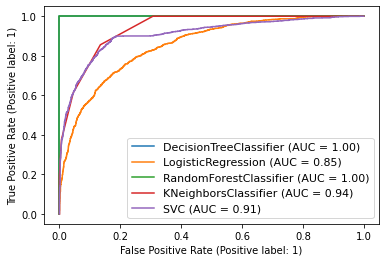

In [172]:
disp = plot_roc_curve(dt,x_train,y_train)

plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(kn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

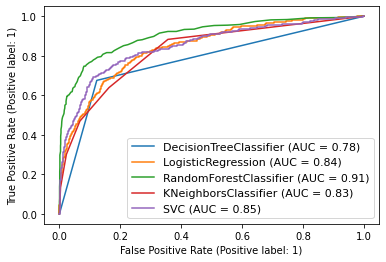

In [173]:
disp = plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

## Saving the Model

In [175]:
import pickle
filename='Rainfall Weather Forecasting'
pickle.dump(grid,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

### Checking predicted and original values

In [178]:
a =np.array(y_test)
predicted=np.array(grid.predict(x_test))
Rainfall_Weather_Forecasting=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Rainfall_Weather_Forecasting

Orginal  Predicted
0           1          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
2523        0          0
2524        0          0
2525        0          0
2526        0          0
2527        0          0

[2528 rows x 2 columns]

##### As we can see, predicted and original values matches approx 100%.

In [180]:
model =Rainfall_Weather_Forecasting.to_csv('Rainfall_Weather_Forecasting.csv')
model

##### Model Prediction saved in CSV format